In [9]:
library(fda)
library(caTools)
library(repr)

In [26]:
# Change plot size to 5 x 4
options(repr.plot.width=5, repr.plot.height=4)

In [19]:
Generate = function(T, w, g, f.median, sigma, trial){
  Y = matrix(0, trial, T)
  #generate the Gaussian white noise curve
  #h = rnorm(T, 0, sigma)
  for(i in 1:trial){
    h = rnorm(T, 0, sigma)
    #generate the constant a
    a = rnorm(1,0,sigma+3)
    Y[i,] = f.median + a*g + h
  }
  return(Y)
}

In [20]:
T = 100
w = seq(1,T,1)/100
g = rep(1, T) #here g(w_k) = 1 for all w_k
trial = 100
#Define a small variance for white noise
sigma = 9

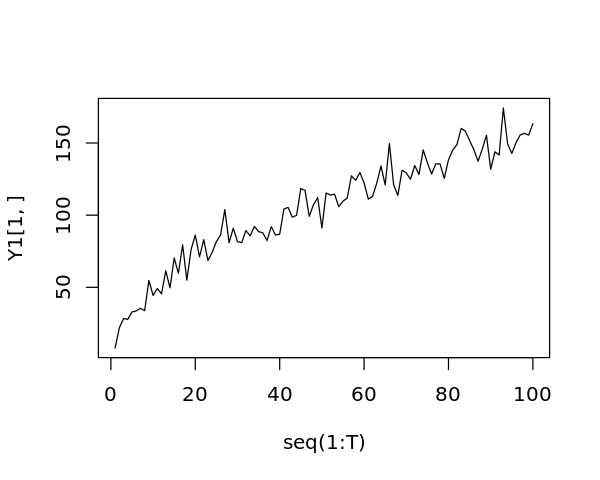

In [30]:
plot(x=seq(1:T), y=Y1[1,], type="l")

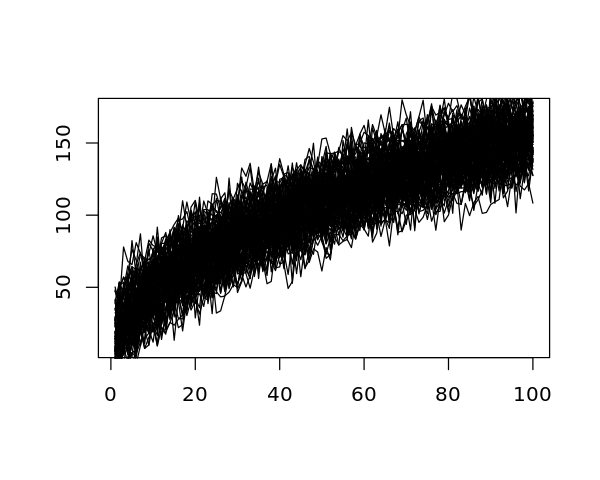

In [21]:
#Define the median curve for first family
f.median1 = 5*sqrt(1000*w)
Y1 = Generate(T, w, g, f.median1, sigma, trial)

plot(x=seq(1:T),y=Y1[1,],ylab="",xlab="",type="l")
for(i in 2:trial){
  lines(x=seq(1:T),y=Y1[i,])
}

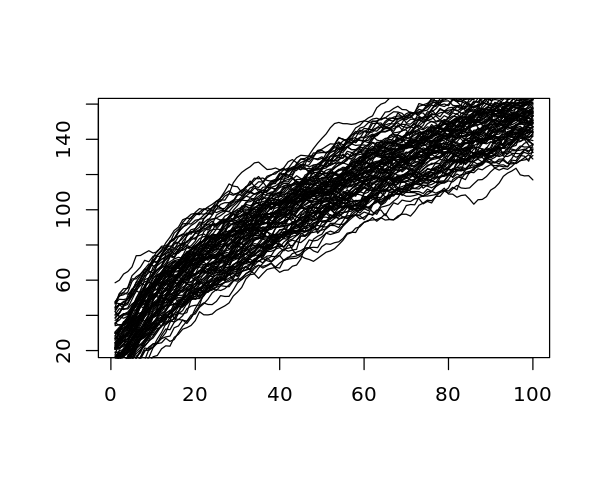

In [22]:
###smooth
Y1.smooth=t(runmean(t(Y1),7))

##plot all smooth
plot(x=seq(1:T),y=Y1.smooth[1,],ylab="",xlab="",type="l")
for(i in 2:trial){
  lines(x=seq(1:T),y=Y1.smooth[i,])
}

In [28]:
dim(Y1.smooth)

[1] 100 100

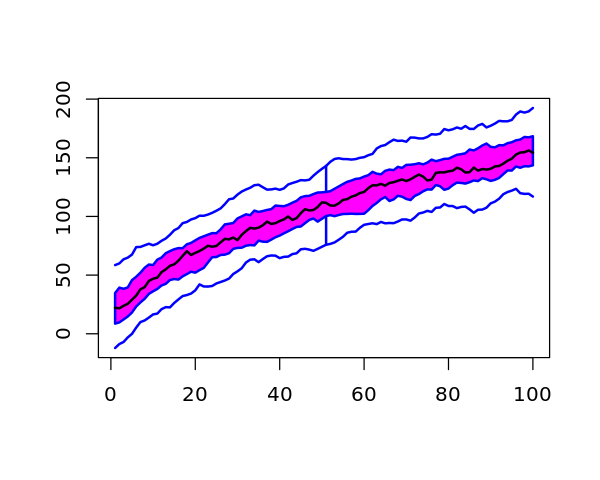

In [23]:
####Functional Box plot
t.grp1=fbplot(t(Y1.smooth),method='MBD',ylab="",xlab="", ylim=c(min(Y1.smooth),max(Y1.smooth)))

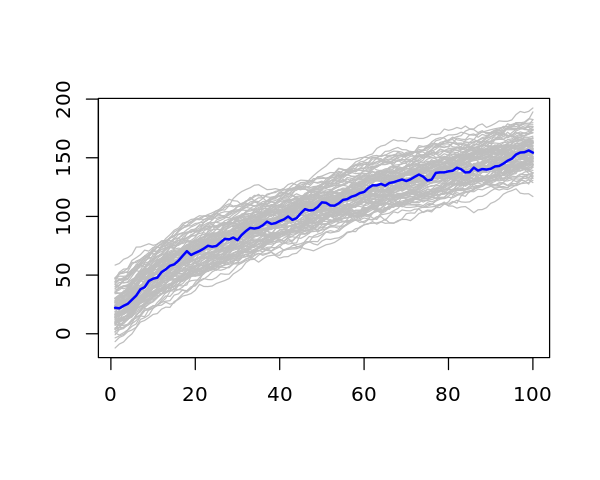

In [24]:
### Get median curve and plot it
index.median = t.grp1$medcurve

plot(x=seq(1:T),y=Y1.smooth[1,],ylim=c(min(Y1.smooth),max(Y1.smooth)),ylab="",xlab="",type="l",col="grey");
for(i in 2:trial){
  lines(x=seq(1:T),y=Y1.smooth[i,],col="grey")
}
lines(Y1.smooth[index.median,],col="blue",lwd=2)


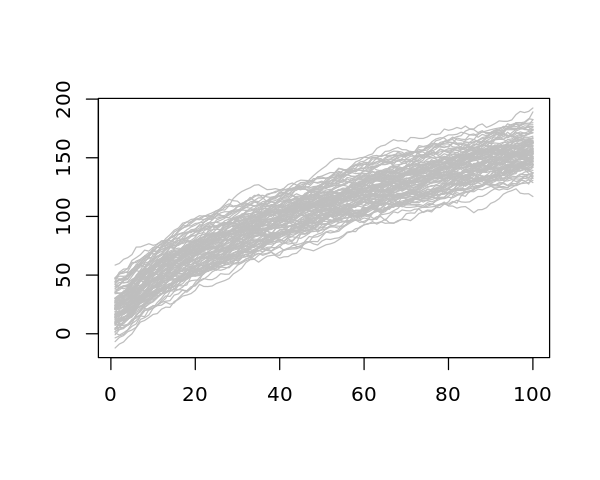

In [25]:
#get outlier curves and plot
index.outlier = t.grp1$outpoint

plot(x=seq(1:T),y=Y1.smooth[1,],ylim=c(min(Y1.smooth),max(Y1.smooth)),ylab="",xlab="",type="l",col="grey");
for(i in 2:trial){
  lines(x=seq(1:T),y=Y1.smooth[i,],col="grey")
}
for(i in 1:length(index.outlier)){
  lines(Y1.smooth[index.outlier[i],],col="red",lwd=2)
}